In [3]:

import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#path = '/Users/diana/Library/Mobile Documents/com~apple~CloudDocs/Maestria/Aprendizaje Automático/HR_attrition_orig_proc.csv'
path = 'datanew.csv'
data = pd.read_csv(path, sep = ',', na_filter = False)
#data = data.iloc[:, 1:]

In [5]:
# Columnas del dataframe
data.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,3.789098,-0.626454,-0.199046,0.561391,0.195449,-0.572336,0.321457,-0.788790,0.431574,0.551343,...,0.823122,0.789786,1.700614,0.384522,0.925802,-0.110698,-0.562646,0.311002,0.959238,0.051584
1,1.429142,0.183643,1.254817,2.194971,2.639988,0.772151,1.314587,2.257993,1.811840,1.367294,...,-0.770535,-1.238368,-1.081488,-0.465512,-1.358593,-1.644816,-1.270086,-0.815181,-1.206401,-1.687794
2,4.166534,-0.835629,0.422708,-0.081814,0.288082,0.874379,0.079819,-1.168313,-1.063122,-1.375074,...,-1.159417,1.364054,1.012995,1.423777,1.875699,1.467236,3.057051,1.780588,0.579437,-0.350954
3,5.509822,1.595281,0.977586,0.474654,0.714617,0.528117,0.535473,-0.991461,-1.251116,-0.711596,...,0.512329,0.648545,0.676692,1.009477,0.545659,0.873144,0.397688,0.242229,0.688888,1.226566
4,4.785675,0.329508,-1.264410,-1.223613,-1.008111,-1.152700,-0.818624,-0.152517,-0.495643,-0.489063,...,-1.261739,0.601501,0.302491,0.542850,0.781383,1.031464,0.296067,-0.612029,-1.167152,-1.511486


In [14]:
data.shape

(200, 51)

In [15]:
test_size = 0.3

In [16]:
# variables seleccionadas según diferentes criterios
y = data[['y']].copy()
X = data.drop(columns = ['y']).copy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
data_train, data_test = train_test_split(data, test_size=test_size)

In [18]:
data_train.to_csv('datanew_train.csv')
data_test.to_csv('datanew_test.csv')

### Leyendo los datos de entrenamiento

In [19]:
path = 'datanew_train.csv'
train = pd.read_csv(path, sep = ',', na_filter = False)
train = train.set_index('Unnamed: 0')

In [20]:
X_train = train.drop(columns = ['y']).copy()
y_train = train[['y']].copy()

In [21]:
standarscaler = StandardScaler()
X_trained_scaled = standarscaler.fit_transform(X_train)

In [22]:
X_trained_scaled = pd.DataFrame(X_trained_scaled, index=X_train.index, columns=X_train.columns.values)

In [23]:
X_trained_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
197,-1.110897,-0.783796,-0.740733,-1.242303,-1.163242,-1.212694,-0.452534,-1.131233,0.133795,-0.418722,...,-1.561397,-2.482910,-1.313567,-1.638248,0.738732,1.625043,0.114122,0.951867,-0.442631,-0.003690
173,-0.126608,-0.138757,-0.313844,0.677869,0.055242,1.012062,1.163580,1.047987,1.476314,1.023488,...,0.976987,1.456594,2.312725,2.590555,2.198431,1.623511,1.245002,0.969153,0.090563,-0.334109
91,1.220829,1.152158,2.304227,1.677860,1.028816,1.287261,0.898676,0.329356,-0.270997,-0.013628,...,1.025245,0.438917,1.205298,1.388782,1.483501,0.643471,-1.208070,0.355058,1.094515,1.585643
32,0.360794,-0.169009,-1.001495,-1.131690,-0.244469,-0.689660,-0.310123,1.028226,2.213308,0.702918,...,0.444737,0.376687,-0.137839,-0.306592,0.468382,-0.870461,-0.757333,1.464392,0.528941,0.243400
115,-0.457595,0.390617,0.490665,-1.067688,-1.171305,-0.512084,-0.617741,-0.661668,-0.896942,-1.862642,...,-0.096453,-0.669618,0.289299,0.543524,1.147592,-0.127134,1.098374,-0.170330,-0.691020,-0.108611


In [24]:
len(X_trained_scaled)

140

### Leyendo los datos del test

In [25]:
path = 'datanew_test.csv'
test = pd.read_csv(path, sep = ',', na_filter = False)
test = test.drop(columns = ['Unnamed: 0']).copy()

In [26]:
X_test = test.drop(columns = ['y']).copy()
y_test = test[['y']].copy()

In [27]:
X_test_scaled = standarscaler.transform(X_test)

In [28]:
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns.values)

### Feature selection

In [29]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
features = [15,16,17,18,19,20,21,22,23,24,25]
selected_features = []
estimator = SVR(kernel="linear")

for i in features:
    selector = RFE(estimator, i, step=1)
    sel_ = selector.fit(X_trained_scaled,np.ravel(y_train))
    selected_feat = X_trained_scaled.columns[sel_.get_support()]
    selected_features.append(selected_feat)

In [31]:
mse_results = {}

def get_random_forest(X_train, X_test, y_train, y_test):
    """
    Retorna una tupla con el error de los modelos en el conjunto train y test
    """

    rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4, n_jobs=8)
    rf.fit(X_train, y_train)
    
    pred = rf.predict(X_train)
    train_mse = mean_squared_error(y_train,pred)
    
    pred = rf.predict(X_test)
    test_mse = mean_squared_error(y_test,pred)
    return train_mse, test_mse

    

In [32]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
for feat_list in selected_features:
    train_mse, test_mse = get_random_forest(X_trained_scaled[feat_list].fillna(0),
                                              X_test_scaled[feat_list].fillna(0),
                                              np.ravel(y_train), y_test)
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ')    

Min test mse of 9.710032064151306
Corresponding features list is: , X2, X3, X6, X7, X11, X12, X15, X25, X29, X30, X33, X35, X38, X39, X40, X41, X42, X44, X46, X47, X48, X49


### 1. Mutual information

In [33]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [34]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), np.ravel(y_train))
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

X23    0.154872
X6     0.129030
X24    0.113757
X11    0.113483
X17    0.103218
X14    0.101668
X33    0.079858
X38    0.073649
X13    0.054264
X5     0.053641
X29    0.048878
X8     0.046084
X36    0.045194
X47    0.036201
X16    0.034210
X39    0.030193
X37    0.029548
X15    0.025808
X32    0.024942
X7     0.016846
X12    0.015568
X3     0.009389
X4     0.008783
X2     0.008598
X18    0.000000
X50    0.000000
X10    0.000000
X20    0.000000
X9     0.000000
X19    0.000000
X25    0.000000
X21    0.000000
X40    0.000000
X48    0.000000
X46    0.000000
X45    0.000000
X44    0.000000
X43    0.000000
X42    0.000000
X41    0.000000
X35    0.000000
X22    0.000000
X34    0.000000
X31    0.000000
X30    0.000000
X28    0.000000
X27    0.000000
X26    0.000000
X49    0.000000
X1     0.000000
dtype: float64

In [35]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [36]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=51).fit(X_train.fillna(0), np.ravel(y_train))
X_train.columns[sel_.get_support()]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X11', 'X12', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X23', 'X24', 'X29', 'X32', 'X33', 'X36',
       'X37', 'X38', 'X39', 'X47'],
      dtype='object')

### 2. Univariate feature selection

In [47]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
univariate = f_regression(X_train.fillna(0), np.ravel(y_train))
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

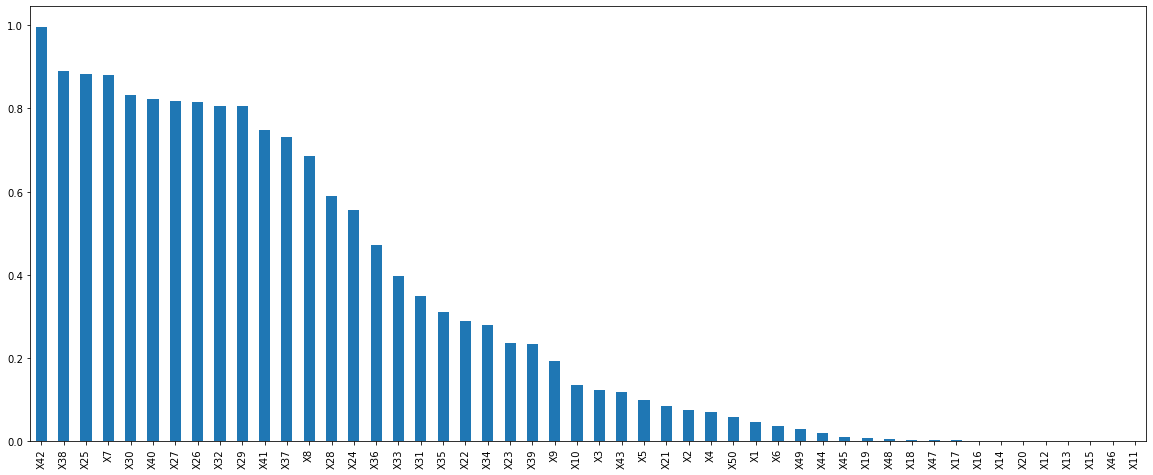

In [49]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [52]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(f_regression, percentile=40).fit(X_train.fillna(0), np.ravel(y_train))
X_train.columns[sel_.get_support()]

Index(['X1', 'X4', 'X6', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       'X18', 'X19', 'X20', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50'],
      dtype='object')

### 3. Step forward

In [53]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [55]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((140, 46), (60, 46))

In [56]:
X_train.fillna(0, inplace=True)

In [63]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
features = [15, 16,17,18, 19, 20, 21, 22]
selected_features= []
for i in features:

    sfs1 = SFS(RandomForestRegressor(n_estimators = 100), 
           n_jobs = -1,
           k_features = i, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)

    sfs1 = sfs1.fit(np.array(X_train), np.ravel(y_train))
    selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
    selected_features.append(selected_feat)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    2.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.4s finished

[2019-09-29 21:05:26] Features: 1/15 -- score: -0.2257531933041565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.4s finished

[2019-09-29 21:05:27] Features: 2/15 -- score: -0.09528014567022795[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  44 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.5s f

[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.9s finished

[2019-09-29 21:06:09] Features: 11/16 -- score: 0.11500377405265585[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    1.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.0s finished

[2019-09-29 21:06:12] Features: 12/16 -- score: 0.10879477852685562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  34 | elapsed:    1.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    2.0s finished

[2019-09-29 21:06:14] Features: 13/16 -- score: 0.1196768599784938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  33 | elapsed:    1.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 out of  43 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.1s finished

[2019-09-29 21:06:59] Features: 4/18 -- score: 0.06951627590107949[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  33 out of  42 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.2s finished

[2019-09-29 21:07:01] Features: 5/18 -- score: 0.07444844242107237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  31 out of  41 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.1s finished

[2019-09-29 21:07:03] Features: 6/18 -- score: 0.07651991664494187[Pa

[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    1.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.4s finished

[2019-09-29 21:07:54] Features: 12/19 -- score: 0.11639771448731111[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  34 | elapsed:    2.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    2.6s finished

[2019-09-29 21:07:57] Features: 13/19 -- score: 0.11604604363991237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  33 | elapsed:    2.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    2.5s finished

[2019-09-29 21:07:59] Features: 14/19 -- score: 0.09015011201310444[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    2.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    2.2s finished

[2019-09-29 21:08:53] Features: 19/20 -- score: 0.07222708410045305[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    1.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.2s finished

[2019-09-29 21:08:55] Features: 20/20 -- score: 0.08310669356094899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.9s finished

[2019-09-29 21:08:57] Features: 1/21 -- score: -0.20871277282633657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | el

[Parallel(n_jobs=-1)]: Done  36 out of  44 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    2.0s finished

[2019-09-29 21:09:46] Features: 3/22 -- score: 0.011155430868562966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 out of  43 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.0s finished

[2019-09-29 21:09:48] Features: 4/22 -- score: 0.05810004792543919[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  33 out of  42 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.2s finished

[2019-09-29 21:09:50] Features: 5/22 -- score: 0.07458392088826413[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurr

In [64]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
for feat_list in selected_features:
    train_mse, test_mse = get_random_forest(X_trained_scaled[feat_list].fillna(0),
                                              X_test_scaled[feat_list].fillna(0),
                                              np.ravel(y_train), y_test)
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 8.630954706124164
Corresponding features list is: , X3, X6, X7, X8, X11, X12, X18, X19, X23, X34, X36, X38, X39, X45, X49


### 4. Step backward feature selection

In [65]:
# step backward greedy selection algorithm

features = [15, 16,17,18, 19, 20, 21, 22]
selected_features= []
for i in features:
    sfs1 = SFS(RandomForestRegressor(n_estimators = 100), 
           n_jobs = -1,
           k_features=i, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)

    sfs1 = sfs1.fit(np.array(X_train), np.ravel(y_train))
    selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
    selected_features.append(selected_feat)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    3.7s finished

[2019-09-29 21:12:23] Features: 45/15 -- score: -0.014104732669531406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.3s finished

[2019-09-29 21:12:27] Features: 44/15 -- score: 0.0002937135130956392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  36 out of  44 | elapsed:    4.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    4

[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.5s finished

[2019-09-29 21:13:31] Features: 21/15 -- score: 0.07759586866317685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    1.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.5s finished

[2019-09-29 21:13:32] Features: 20/15 -- score: 0.10121611010201267[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    0.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished

[2019-09-29 21:13:34] Features: 19/15 -- score: 0.08383776046966367[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  19 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.4s finished

[2019-09-29 21:13:35] Features: 18/15

[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.3s finished

[2019-09-29 21:14:52] Features: 26/16 -- score: 0.10364364326920336[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  26 | elapsed:    1.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  23 out of  26 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    2.1s finished

[2019-09-29 21:14:54] Features: 25/16 -- score: 0.06821602289833772[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:    1.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished

[2019-09-2

[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    3.5s finished

[2019-09-29 21:16:12] Features: 32/17 -- score: 0.03402814849492734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    2.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    2.8s finished

[2019-09-29 21:16:15] Features: 31/17 -- score: 0.04015293332507477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    1.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    2.8s finished

[2019-09-29 21:16:18] Features: 30/17 -- score: 0.036180523008214616[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished

[2019-09-29 21:16:21] Features: 29/1

[Parallel(n_jobs=-1)]: Done  25 out of  37 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    4.0s finished

[2019-09-29 21:17:37] Features: 36/18 -- score: 0.006291580263546037[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    4.0s finished

[2019-09-29 21:17:41] Features: 35/18 -- score: 0.032594913892613174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    3.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.9s finished

[2019-09-29 21:17:45] Features: 34/18 -- score: 0.020146827031816604[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  34 | elapsed:    2.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    3.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.0s finished

[2019-09-29 21:19:02] Features: 39/19 -- score: 0.0448001368923205[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  39 | elapsed:    3.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    4.8s finished

[2019-09-29 21:19:07] Features: 38/19 -- score: 0.02487130723423574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  38 | elapsed:    3.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    4.8s finished

[2019-09-29 21:19:12] Features: 37/19 -- score: 0.051178445253825755[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  37 | el

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  33 out of  42 | elapsed:    5.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    5.1s finished

[2019-09-29 21:20:32] Features: 41/20 -- score: 0.006070303611096661[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  31 out of  41 | elapsed:    3.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    5.1s finished

[2019-09-29 21:20:37] Features: 40/20 -- score: 0.014054115242038433[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    3.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.7s finished

[2019-09-29 21:20:42] Features: 39/20 -- score: 0.016898515547271

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  34 out of  43 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    5.2s finished

[2019-09-29 21:22:00] Features: 42/21 -- score: -0.036219390140149986[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  33 out of  42 | elapsed:    5.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    5.1s finished

[2019-09-29 21:22:05] Features: 41/21 -- score: -0.028790465811088527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  31 out of  41 | elapsed:    3.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    5.0s finished

[2019-09-29 21:22:10] Features: 40/21 -- score: -0.021780335128

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  34 out of  43 | elapsed:    4.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    4.9s finished

[2019-09-29 21:23:29] Features: 42/22 -- score: 0.0012911504366365679[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  33 out of  42 | elapsed:    4.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    4.8s finished

[2019-09-29 21:23:33] Features: 41/22 -- score: 0.008204634746469996[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  31 out of  41 | elapsed:    3.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    4.6s finished

[2019-09-29 21:23:38] Features: 40/22 -- score: 0.00524814848591

In [42]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
for feat_list in selected_features:
    train_mse, test_mse = get_random_forest(X_trained_scaled[feat_list].fillna(0),
                                              X_test_scaled[feat_list].fillna(0),
                                              np.ravel(y_train), y_test)
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 9.710032064151306
Corresponding features list is: , X2, X3, X6, X7, X11, X12, X15, X25, X29, X30, X33, X35, X38, X39, X40, X41, X42, X44, X46, X47, X48, X49


### 5. Exhaustive feature selection

In [67]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [70]:
# exhaustive search

# in order to shorter search time for the demonstration
# i will ask the algorithm to try all possible 1,2,3 and 4
# feature combinations from a dataset of 4 features

# if you have access to a multicore or distributed computer
# system you can try more greedy searches

efs1 = EFS(RandomForestRegressor(n_jobs=-1,n_estimators = 100), 
           min_features=1,
           max_features=5, 
           scoring='r2',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(np.array(X_train[X_train.columns[0:5]]), np.ravel(y_train))

Features: 31/31

In [71]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['X1', 'X2', 'X4', 'X5', 'X8', 'X9', 'X11', 'X12', 'X13', 'X14', 'X16',
       'X17', 'X18', 'X19', 'X24', 'X30', 'X32', 'X33', 'X35', 'X39', 'X44',
       'X48'],
      dtype='object')

### Lasso

In [72]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

In [102]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = LassoCV(cv=5)
sel_ = SelectFromModel(clf, threshold=0.1)
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [103]:
#sel_.get_support()

In [104]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 46
selected features: 15
features with coefficients shrank to zero: 24


In [105]:
selected_feat

Index(['X1', 'X2', 'X6', 'X7', 'X11', 'X15', 'X18', 'X20', 'X27', 'X35', 'X38',
       'X39', 'X45', 'X46', 'X49'],
      dtype='object')

In [106]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 9.331037554299717
Corresponding features list is: , X1, X2, X4, X5, X8, X9, X11, X12, X13, X14, X16, X17, X18, X19, X24, X30, X32, X33, X35, X39, X44, X48


### Lasso Lars

In [110]:
from sklearn.linear_model import LassoLarsCV

In [123]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = LassoLarsCV(cv=5)
sel_ = SelectFromModel(clf, threshold=0.1)
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=LassoLarsCV(copy_X=True, cv=5,
                                      eps=2.220446049250313e-16,
                                      fit_intercept=True, max_iter=500,
                                      max_n_alphas=1000, n_jobs=None,
                                      normalize=True, positive=False,
                                      precompute='auto', verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [124]:
sel_.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True])

In [125]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 46
selected features: 13
features with coefficients shrank to zero: 26


In [126]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 9.291253580036333
Corresponding features list is: , X1, X2, X4, X5, X8, X9, X11, X12, X13, X14, X16, X17, X18, X19, X24, X30, X32, X33, X35, X39, X44, X48


### Lars 

In [158]:
from sklearn.linear_model import LarsCV

In [163]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = LarsCV(cv=5)
sel_ = SelectFromModel(clf, threshold=0.1)
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=LarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16,
                                 fit_intercept=True, max_iter=500,
                                 max_n_alphas=1000, n_jobs=None, normalize=True,
                                 positive=False, precompute='auto',
                                 verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [164]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [165]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 46
selected features: 4
features with coefficients shrank to zero: 38


In [166]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 9.08700723743585
Corresponding features list is: , X1, X2, X4, X5, X8, X9, X11, X12, X13, X14, X16, X17, X18, X19, X24, X30, X32, X33, X35, X39, X44, X48


### ElasticNetCV

In [137]:
from sklearn.linear_model import ElasticNetCV

In [154]:
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = ElasticNetCV(cv=5, l1_ratio=1.5)
sel_ = SelectFromModel(clf, threshold=0.5)
sel_.fit(X_train.fillna(0), np.ravel(y_train))


SelectFromModel(estimator=ElasticNetCV(alphas=None, copy_X=True, cv=5,
                                       eps=0.001, fit_intercept=True,
                                       l1_ratio=1.5, max_iter=1000,
                                       n_alphas=100, n_jobs=None,
                                       normalize=False, positive=False,
                                       precompute='auto', random_state=None,
                                       selection='cyclic', tol=0.0001,
                                       verbose=0),
                max_features=None, norm_order=1, prefit=False, threshold=0.5)

In [155]:
sel_.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [156]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]


print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 46
selected features: 5
features with coefficients shrank to zero: 28


In [157]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 8.162353101376423
Corresponding features list is: , X1, X2, X4, X5, X8, X9, X11, X12, X13, X14, X16, X17, X18, X19, X24, X30, X32, X33, X35, X39, X44, X48


### Linear Regression coefficients

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
# here, again I will train a Linear regression and select
# features with higher coefficients all in one line of code.

# the LinearRegression object from sklearn is a non-regularised
# linear method. It fits by matrix multiplication and not 
# gradient descent.

# therefore I don't need to specify penalty and other parameters

sel_ = SelectFromModel(LinearRegression())
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [169]:
# let's count the number of variables selected
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

17

In [170]:
# and now, let's compare the  amount of selected features
# with the amount of features which coefficient is above the
# mean coefficient, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(np.abs(sel_.estimator_.coef_) > np.abs(sel_.estimator_.coef_).mean())))

total features: 46
selected features: 17
features with coefficients greater than the mean coefficient: 17


In [171]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 8.834856409288625
Corresponding features list is: , X1, X2, X4, X5, X8, X9, X11, X12, X13, X14, X16, X17, X18, X19, X24, X30, X32, X33, X35, X39, X44, X48


In [172]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Random Forest instance, indicating
# the number of trees (the default value in sklearn is 10

# Then I use the selectFromModel object from sklearn
# to automatically select the features

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [173]:
# let's make a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

18

In [174]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean importance, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

total features: 46
selected features: 18
features with coefficients greater than the mean coefficient: 18


In [175]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 8.993832406639806
Corresponding features list is: , X1, X2, X4, X5, X8, X9, X11, X12, X13, X14, X16, X17, X18, X19, X24, X30, X32, X33, X35, X39, X44, X48


### Univariate  mse

In [176]:

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [177]:
# loop to build a tree, make predictions and get the mse
# for each feature of the train set
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [178]:
# let's add the variable names and order it for clearer visualisation
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)

X7     27.169376
X44    27.026146
X21    26.880007
X36    25.359673
X34    24.491553
X3     24.271263
X11    24.258960
X17    23.937119
X27    23.378583
X12    23.200015
X8     23.170794
X45    22.888973
X6     22.606054
X19    22.329720
X28    22.164548
X48    21.962886
X35    21.710712
X30    21.405557
X15    21.163080
X47    21.149449
X1     21.087231
X40    20.003587
X33    19.932398
X20    19.824906
X49    19.609226
X32    19.546458
X29    19.418746
X18    19.366037
X39    19.220649
X5     19.212567
X23    19.004270
X42    18.722276
X46    17.873671
X9     17.846613
X16    17.554889
X37    17.130798
X2     16.595021
X4     16.163625
X31    15.977529
X14    15.902140
X10    15.243997
X25    14.762108
X13    13.931188
X38    12.988862
X22    12.780820
X24    12.670608
dtype: float64

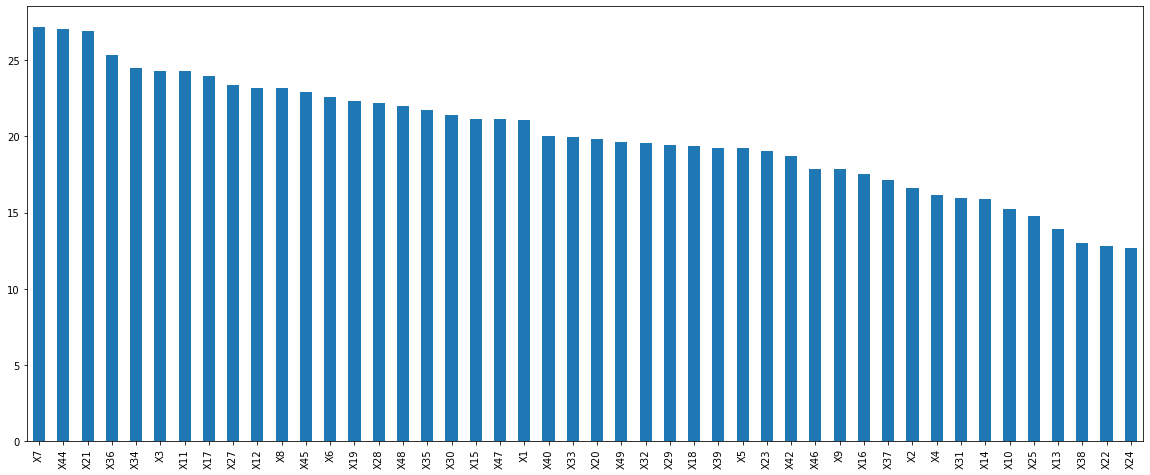

In [179]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [180]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(mse_values[mse_values < 20])

24

# Modelos

## random forest

In [118]:
from sklearn.linear_model import LinearRegression

In [37]:
X_pred0 = ['X1','X2','X4','X5','X8','X9','X11','X12','X13','X14','X16','X17','X18','X19','X24','X30','X32','X33','X35','X39','X44','X48']
X_pred1 = ['X1','X2','X4','X8','X11','X13','X14','X16','X17','X18','X19','X24','X33','X35','X39','X44']
X_pred2 = ['X1','X4','X11','X13','X16','X18','X19','X39']
X_pred3 = ['X11','X18','X39']

In [38]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred0].fillna(0),
                                              X_test_scaled[X_pred0].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')


train mse of 3.611168395590545
test mse of 10.748155124168107


In [39]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred1].fillna(0),
                                              X_test_scaled[X_pred1].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')

train mse of 3.8270367553021387
test mse of 10.86022529265452


In [40]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred2].fillna(0),
                                              X_test_scaled[X_pred2].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')

train mse of 4.291387314409011
test mse of 10.916922221469294


In [41]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred3].fillna(0),
                                              X_test_scaled[X_pred3].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')

train mse of 4.841692499258934
test mse of 11.010497117202194
